In [1]:
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scienceplots


base_path = "../data/processed_data/" #+ "without_maw_rte/" 
path_counter = base_path + "counter/"
path_mean_std = base_path + "mean_std/"

base_plot_path = "./plots/"

base_name = "results_{}__{}_{}.pt"

model_list = ['Llama-2-7b-hf', 'phi-2', 'Mistral-7B-v0.1', 'Baichuan-7B', 'Qwen2.5-7B'] 


dataset_list = ['c4', 'oscar', 'redpajama', 'pile', 'gsm8k', 'svamp', 'mawps', 'anli_r1', 'esnli', 'rte', 'boolq', 'commonsense_qa', 'race',
                'winogrande', 'wmt14', 'iwslt', 'opc', 'ds1000', 'mbpp', 'ellipses', 'random']


non_sensical_data = ['ellipses', 'random']

runs = range(len(dataset_list))
print("Number of datasets: ", len(dataset_list))

#mawps, rte tested with float32. All others with float16
plt.style.use('science')

sns.set_context("notebook", rc={
    "axes.linewidth": 0.5,
    "axes.titlesize": 22,
    "axes.labelsize": 18,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
})

Number of datasets:  21


In [2]:
#DA rivedere per tutti i modelli...

path = "../data/processed_data/specs_layers.csv"
name_csv = pd.read_csv(path)
name_csv = name_csv[name_csv["layer"]==0]
#print(name_csv)

dictionary_components = {}

for model in model_list:
    print(model)
    model_data = name_csv[name_csv["model"]==model]
    
    components_names = [model_data.iloc[i]["name"] for i in range(len(model_data))]
    
    components_ids = range(1, len(components_names) + 1)

    dictionary_model = {key: value for key, value in zip(components_ids, components_names)}
    dictionary_components[model] = dictionary_model

print(dictionary_components)

Llama-2-7b-hf
phi-2
Mistral-7B-v0.1
Baichuan-7B
Qwen2.5-7B
{'Llama-2-7b-hf': {1: 'self_attn.q_proj', 2: 'self_attn.k_proj', 3: 'self_attn.v_proj', 4: 'self_attn.o_proj', 5: 'mlp.gate_proj', 6: 'mlp.up_proj', 7: 'mlp.down_proj'}, 'phi-2': {1: 'self_attn.q_proj', 2: 'self_attn.k_proj', 3: 'self_attn.v_proj', 4: 'self_attn.dense', 5: 'mlp.fc1', 6: 'mlp.fc2'}, 'Mistral-7B-v0.1': {1: 'self_attn.q_proj', 2: 'self_attn.k_proj', 3: 'self_attn.v_proj', 4: 'self_attn.o_proj', 5: 'mlp.gate_proj', 6: 'mlp.up_proj', 7: 'mlp.down_proj'}, 'Baichuan-7B': {1: 'self_attn.W_pack', 2: 'self_attn.o_proj', 3: 'mlp.gate_proj', 4: 'mlp.down_proj', 5: 'mlp.up_proj'}, 'Qwen2.5-7B': {1: 'self_attn.q_proj', 2: 'self_attn.k_proj', 3: 'self_attn.v_proj', 4: 'self_attn.o_proj', 5: 'mlp.gate_proj', 6: 'mlp.up_proj', 7: 'mlp.down_proj'}}


In [3]:
#Create a custom color palette for the plot

original_cmap = sns.color_palette("Spectral_r", as_cmap=True) 
colors = np.concatenate((original_cmap(np.linspace(0, 0.35, 4)), original_cmap(np.linspace(0.6, 1, 4))), axis=0) # Extract 10 colors
print(colors)
custom_palette = np.clip(colors, 0, 1) # Ensure valid RGB range
custom_palette = [tuple(c) for c in custom_palette]  # Convert array to list of 


palette_heatmap =  sns.color_palette("Blues", as_cmap=True) 
colors_blues = np.concatenate((palette_heatmap(np.linspace(0, 0.35, 1)), palette_heatmap(np.linspace(0.8, 1, 10))), axis=0) # Extract 10 colors
custom_blues = np.clip(colors_blues, 0, 1) # Ensure valid RGB range
custom_blues = [tuple(c) for c in custom_blues]  # Convert array to list of 

one_color = sns.color_palette("mako", as_cmap=True).colors[190]

[[0.36862745 0.30980392 0.63529412 1.        ]
 [0.22406767 0.5645521  0.72825836 1.        ]
 [0.48489043 0.79400231 0.64582853 1.        ]
 [0.78400615 0.91280277 0.6200692  1.        ]
 [0.99607843 0.87843137 0.54509804 1.        ]
 [0.98039216 0.59738562 0.34117647 1.        ]
 [0.87581699 0.30457516 0.29411765 1.        ]
 [0.61960784 0.00392157 0.25882353 1.        ]]


<h3>Wanda score</h3>

In [4]:
result_counter = pd.read_csv(base_path + "counter.csv")
result_counter["normalized_percentage"] = result_counter["percentage_elements"] / result_counter["sparsity"]

#Remove all data not in model_list
result_counter = result_counter[result_counter["model"].isin(model_list)]


all_categories_names = ['general_datasets', 'aritm_reasoning', 'nlu_inference', 'commonsense_qa', 'translation', 'coding', 'mixed']
all_categories_names_print = ['Language Modeling', 'Mathematical Reasoning', 'NLI', 'Question Answering', 'Translation', 'Coding', 'Mixed']

rename_dictionary = {all_categories_names[i]: all_categories_names_print[i] for i in range(len(all_categories_names))} 
rename_dictionary.update({'non_sensical': 'Non sensical'})

<h1>Task group function</h1>

<>:20: SyntaxWarning: invalid escape sequence '\%'
<>:31: SyntaxWarning: invalid escape sequence '\%'
<>:47: SyntaxWarning: invalid escape sequence '\%'
<>:20: SyntaxWarning: invalid escape sequence '\%'
<>:31: SyntaxWarning: invalid escape sequence '\%'
<>:47: SyntaxWarning: invalid escape sequence '\%'
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_31459/2668660862.py:20: SyntaxWarning: invalid escape sequence '\%'
  ax[0,0].set_title("Weights never pruned\n(sum = 100\%)")
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_31459/2668660862.py:31: SyntaxWarning: invalid escape sequence '\%'
  ax[1,0].set_title("Weights always pruned\n(sum = 100\%)")
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_31459/2668660862.py:47: SyntaxWarning: invalid escape sequence '\%'
  ax[2,0].set_title("Weights pruned sometimens\n(sum = 100\%)")


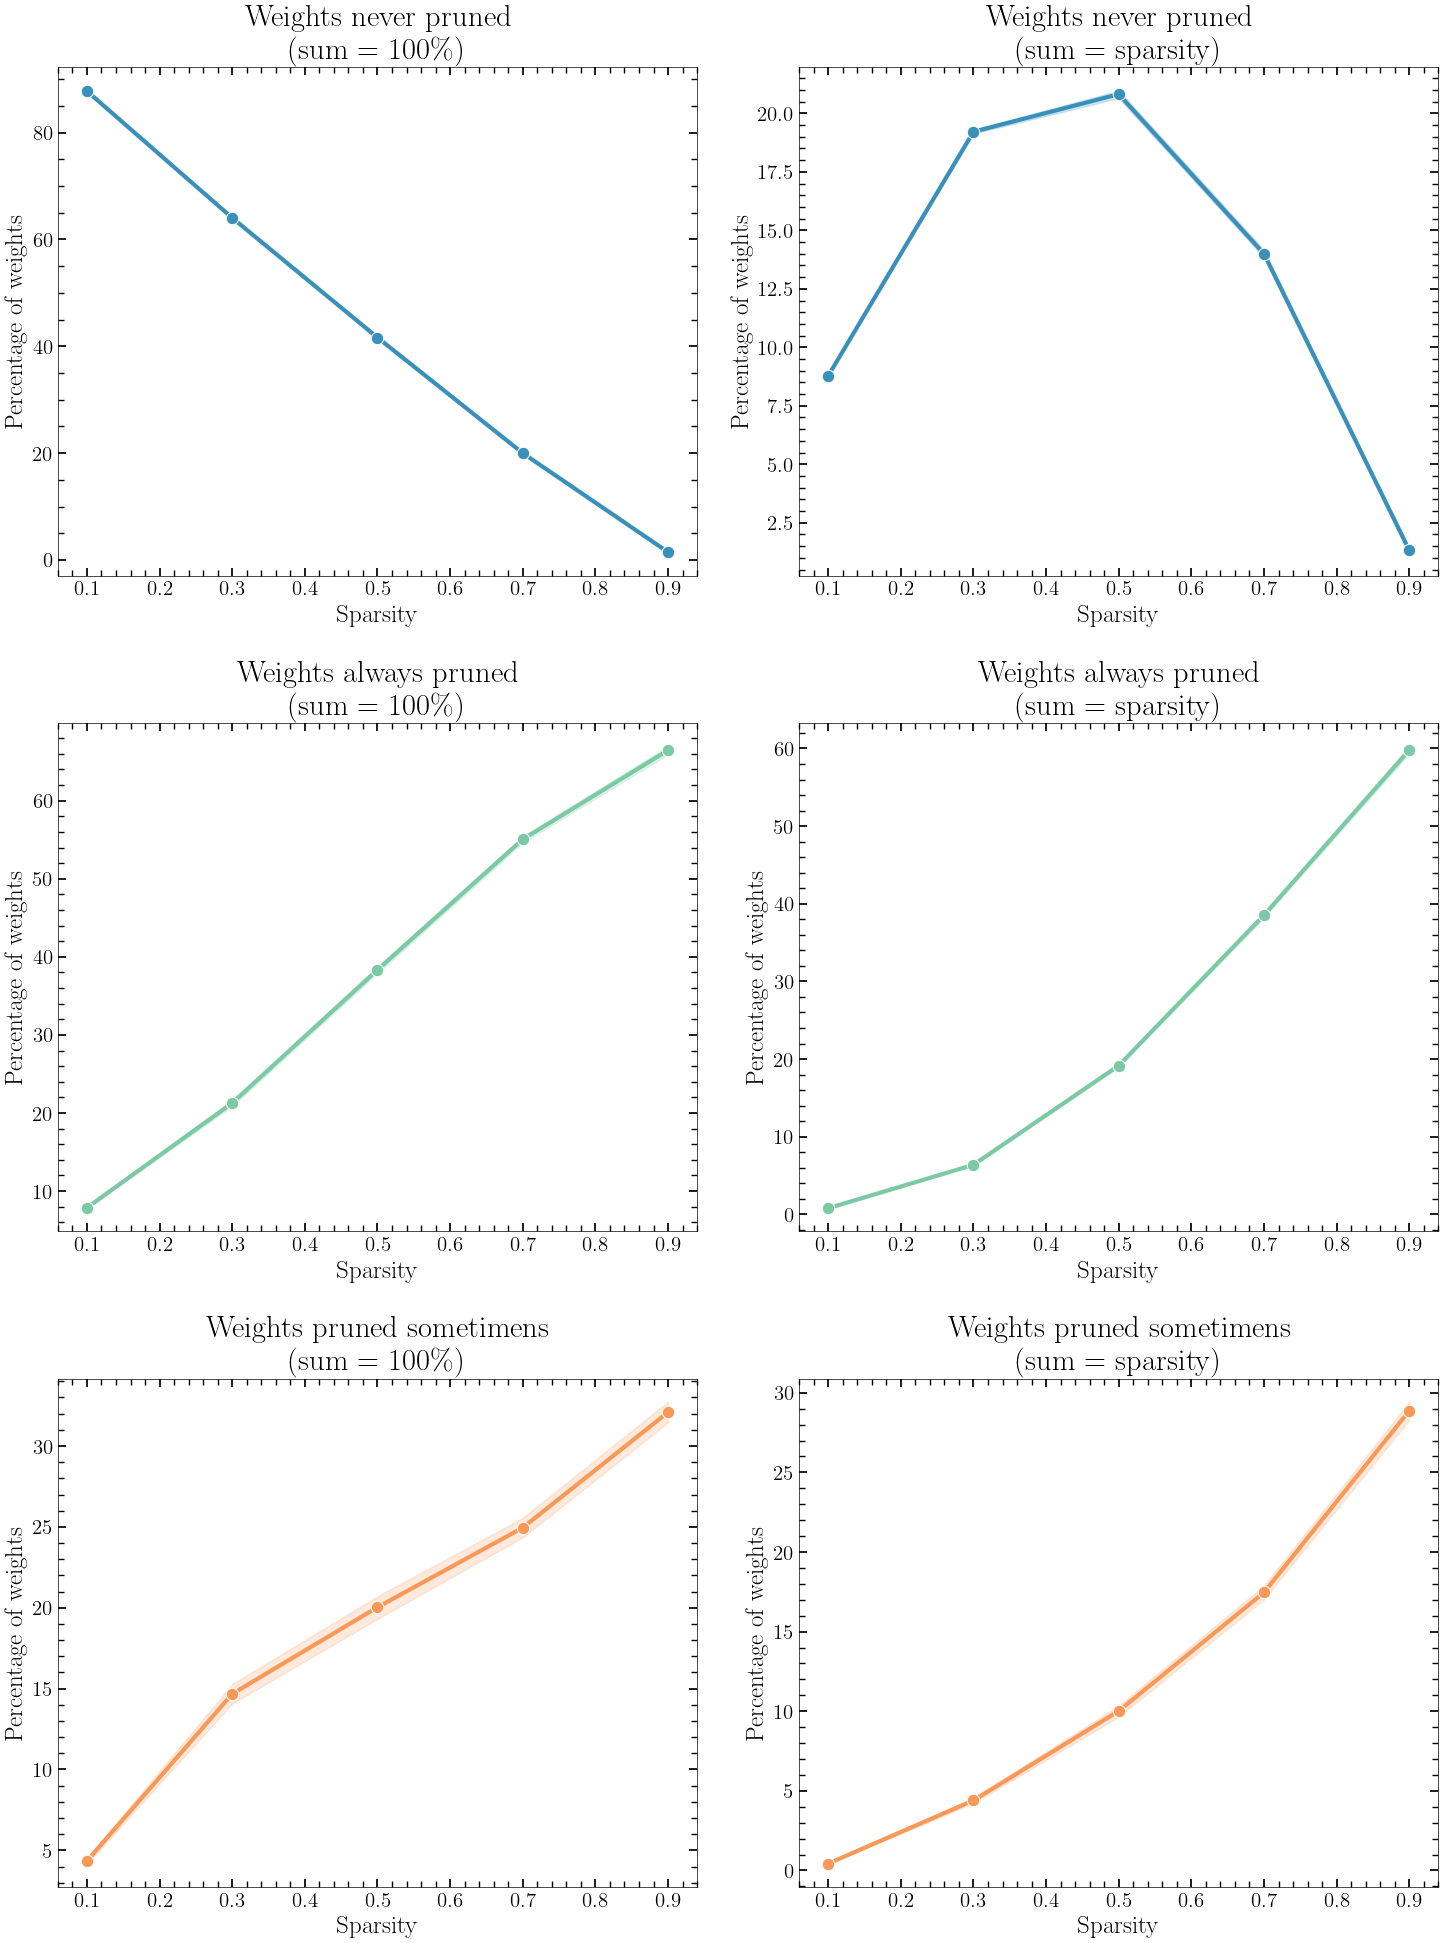

In [ ]:

#result_counter["component"] = result_counter["component"].map(dictionary_components)
result_counter["normalized_percentage"] = ((result_counter["percentage_elements"]/100) * (result_counter["sparsity"]))*100


def plot_task_group_function(data, model):
    #print(results)
    #result_counter_model = results[(results["category_name"] != "non_sensical") & (results["category_name"] != "mixed")]

    figure, ax = plt.subplots(3, 2, figsize=(15, 20))
    
    
    if model != 'avg':
        figure.suptitle("model {}".format(model), fontsize=16)
    #print(result_counter_model[result_counter_model["occurrence"]== 0])
    
    sns.lineplot(data=data[data["occurrence"]== 0], x="sparsity", y="percentage_elements", ax=ax[0, 0], color=custom_palette[1], marker="o", linewidth=3, markersize=9)
    sns.lineplot(data=data[data["occurrence"]== 0], x="sparsity", y="normalized_percentage", ax=ax[0, 1], color=custom_palette[1], marker="o", linewidth=3, markersize=9)
    #ax[1,1].set_xticklabels(components_names, rotation=45, ha='center', fontsize=8)

    ax[0,0].set_title("Weights never pruned\n(sum = 100\%)")
    ax[0,1].set_title("Weights never pruned\n(sum = sparsity)")
    ax[0,0].set_xlabel("Sparsity")
    ax[0,1].set_xlabel("Sparsity")
    ax[0,0].set_ylabel("Percentage of weights")
    ax[0,1].set_ylabel("Percentage of weights")

    sns.lineplot(data=data[data["percentage_occurrence"] == 100.0], x="sparsity", y="percentage_elements", ax=ax[1, 0], color=custom_palette[2], marker="o", linewidth=3, markersize=9)
    sns.lineplot(data=data[data["percentage_occurrence"] == 100.0], x="sparsity", y="normalized_percentage", ax=ax[1, 1], color=custom_palette[2], marker="o", linewidth=3, markersize=9)
    #ax[2, 1].set_xticklabels(components_names, rotation=45, ha='center', fontsize=8)

    ax[1,0].set_title("Weights always pruned\n(sum = 100\%)")
    ax[1,1].set_title("Weights always pruned\n(sum = sparsity)")
    ax[1,0].set_xlabel("Sparsity")
    ax[1,1].set_xlabel("Sparsity")
    ax[1,0].set_ylabel("Percentage of weights")
    ax[1,1].set_ylabel("Percentage of weights")


    #data different node
    data_different_node = data[(data["percentage_occurrence"] != 0) & (data["percentage_occurrence"] != 100.0)][["percentage_elements", "normalized_percentage", "level", "component", "sparsity", "model"]]
    data_different_node = data_different_node.groupby(["model", "level", "component", "sparsity"]).sum().reset_index()
    sns.lineplot(data=data_different_node, x="sparsity", y="percentage_elements", ax=ax[2, 0], color=custom_palette[5], marker="o", linewidth=3, markersize=9)
    sns.lineplot(data=data_different_node, x="sparsity", y="normalized_percentage",  ax=ax[2, 1], color=custom_palette[5], marker="o", linewidth=3, markersize=9)
    
    #ax[3, 1].set_xticklabels(components_names, rotation=45, ha='center', fontsize=8)

    ax[2,0].set_title("Weights pruned sometimens\n(sum = 100\%)")
    ax[2,1].set_title("Weights pruned sometimens\n(sum = sparsity)")
    ax[2,0].set_xlabel("Sparsity")
    ax[2,1].set_xlabel("Sparsity")
    ax[2,0].set_ylabel("Percentage of weights")
    ax[2,1].set_ylabel("Percentage of weights")


    figure.tight_layout(pad=2.0)
    plt.show()


model_and_avg = ['avg'] # + model_list

for model in model_and_avg: # model_list: #['Llama-2-7b-hf']
    if model == 'avg':
        result_counter_model = result_counter
    else:
        result_counter_model = result_counter[result_counter["model"]==model]
j
    plot_task_group_function(result_counter_model, model)
    

<h1>Separated by group</h1>

<>:31: SyntaxWarning: invalid escape sequence '\%'
<>:44: SyntaxWarning: invalid escape sequence '\%'
<>:66: SyntaxWarning: invalid escape sequence '\%'
<>:31: SyntaxWarning: invalid escape sequence '\%'
<>:44: SyntaxWarning: invalid escape sequence '\%'
<>:66: SyntaxWarning: invalid escape sequence '\%'
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_31459/4151653881.py:31: SyntaxWarning: invalid escape sequence '\%'
  ax[0,0].set_title("Weights never pruned\n(sum = 100\%)")
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_31459/4151653881.py:44: SyntaxWarning: invalid escape sequence '\%'
  ax[1,0].set_title("Weights always pruned\n(sum = 100\%)")
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_31459/4151653881.py:66: SyntaxWarning: invalid escape sequence '\%'
  ax[2,0].set_title("Weights pruned sometimens\n(sum = 100\%)")


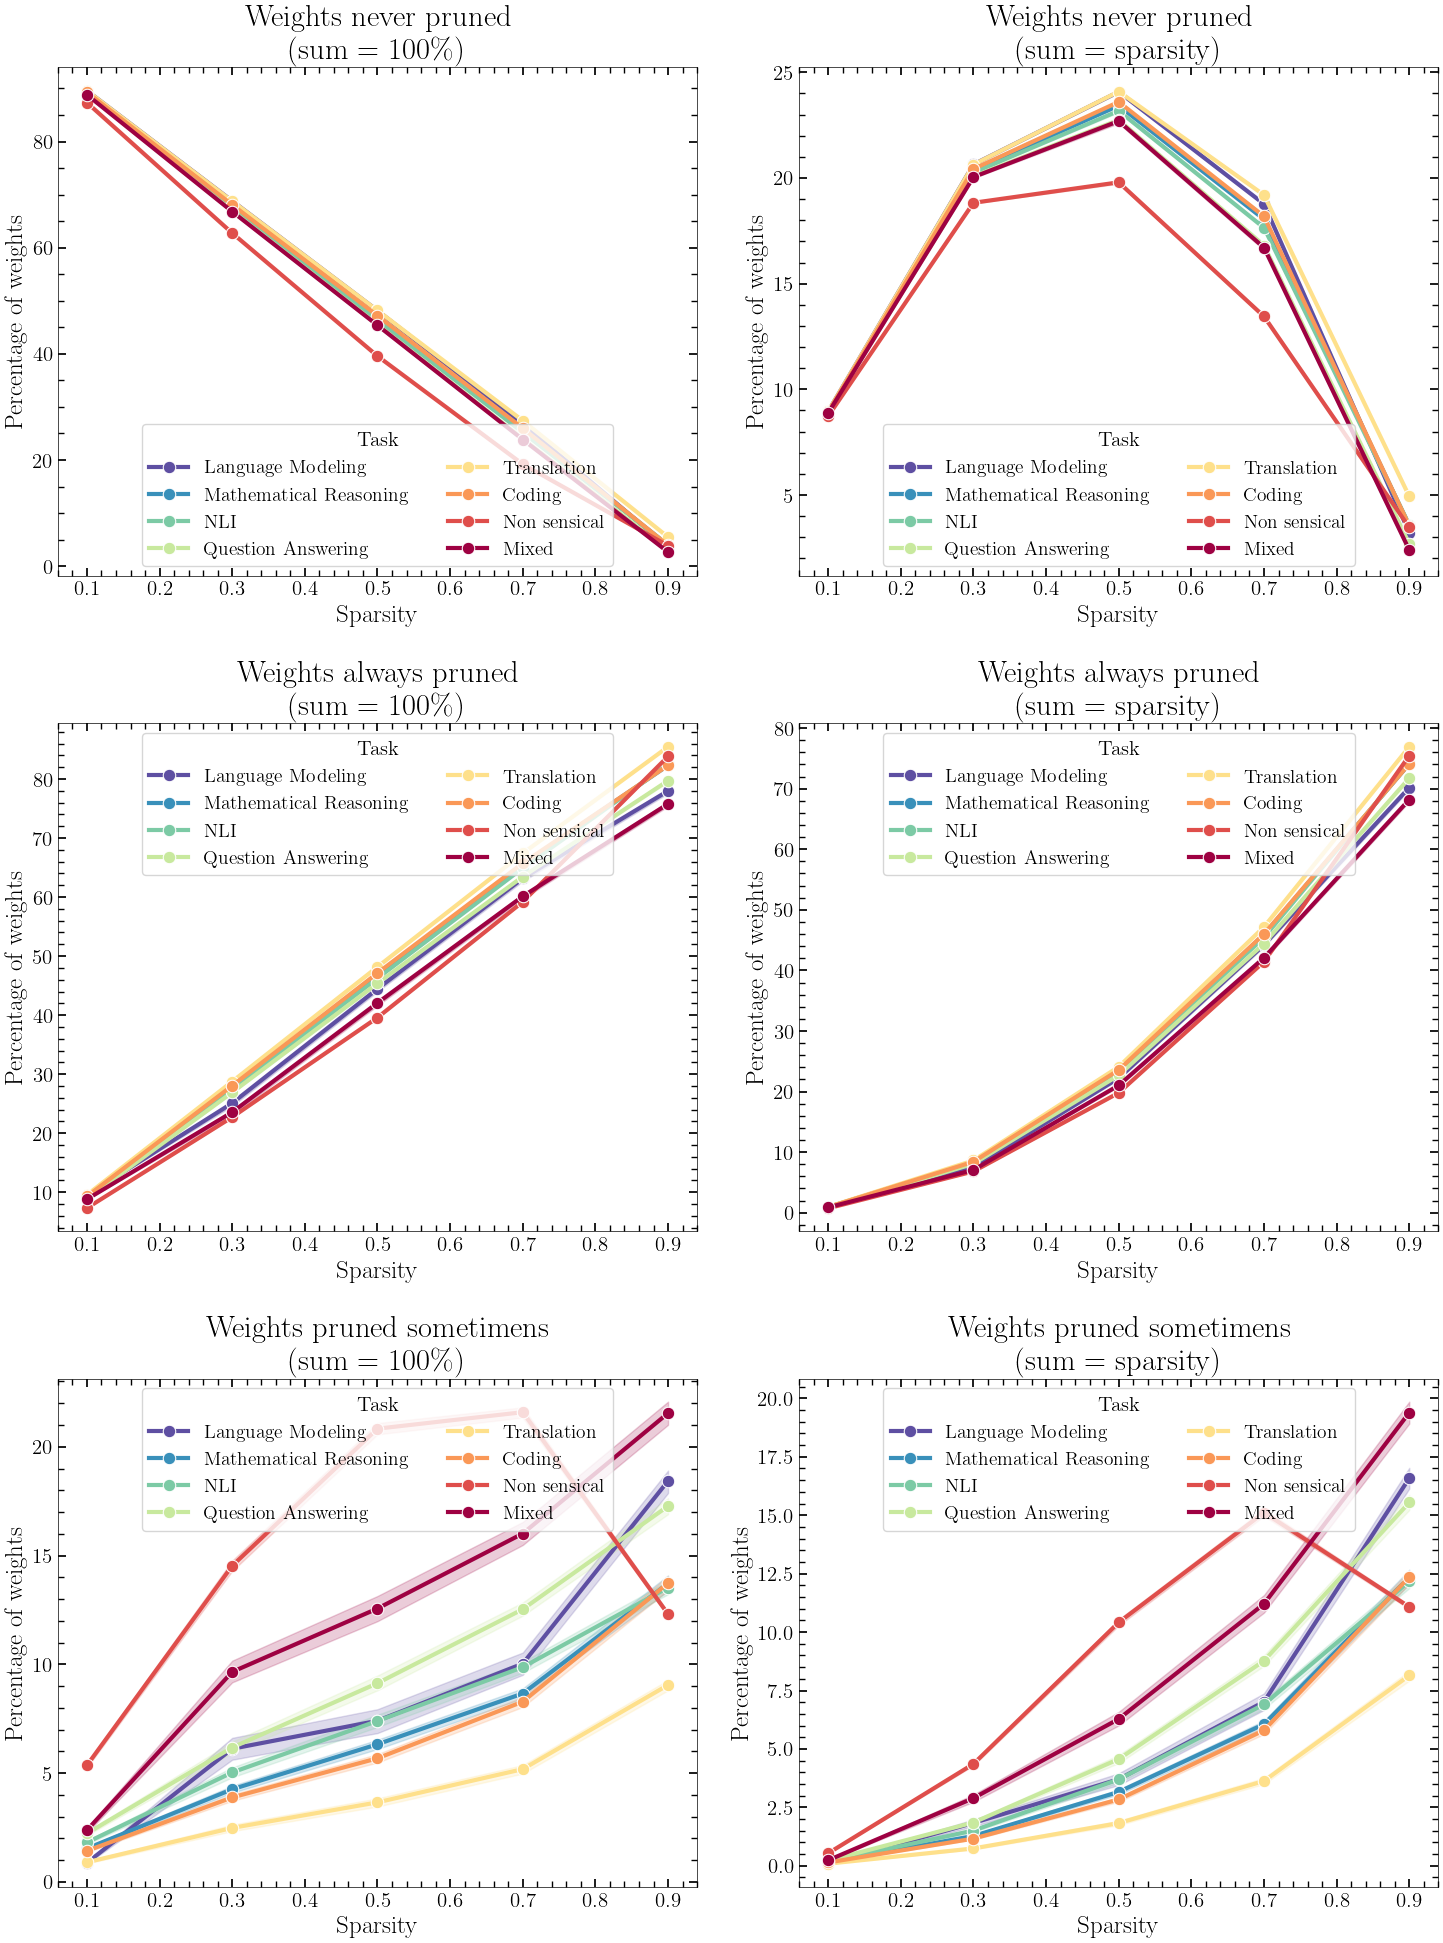

In [6]:
result_counter_similarity = pd.read_csv(base_path + "counter_grouped_similarity.csv")
result_counter_similarity = result_counter_similarity[result_counter_similarity["model"].isin(model_list)]


#result_counter["component"] = result_counter["component"].map(dictionary_components)
result_counter_similarity["normalized_percentage"] = ((result_counter_similarity["percentage_elements"]/100) * (result_counter_similarity["sparsity"]))*100

def plot_task_group_function_by_group(data, model):
    #figure, ax = plt.subplots(4, 2, figsize=(12, 20))
    figure, ax = plt.subplots(3, 2, figsize=(15, 20))
    
    if model != 'avg':
        figure.suptitle("model {}".format(model), fontsize=16)



    #sns.lineplot(data=data, x="percentage_occurrence", y="percentage_elements", hue="sparsity", ax=ax[0, 0], palette=custom_palette, marker="o")
    #sns.lineplot(data=data, x="percentage_occurrence", y="percentage_elements", hue="component", ax=ax[0, 1], palette=custom_palette, marker="o")
    #ax[0,0].set_title("Percentage of weights Percentage times\n(across datasets)")
    #ax[0,1].set_title("Percentage of weights Percentage times\n(across datasets)")
    #ax[0,0].set_xlabel("Percentage of times pruned")
    #ax[0,1].set_xlabel("Percentage of times pruned")
    #ax[0,0].set_ylabel("Percentage of weights")
    #ax[0,1].set_ylabel("Percentage of weights")


    sns.lineplot(data=data[data["occurrence"]== 0], x="sparsity", y="percentage_elements", hue="category_name", ax=ax[0, 0], palette=custom_palette, marker="o", linewidth=3, markersize=9)
    sns.lineplot(data=data[data["occurrence"]== 0], x="sparsity", y="normalized_percentage", hue="category_name", ax=ax[0, 1], palette=custom_palette, marker="o", linewidth=3, markersize=9)
    #ax[1,1].set_xticklabels(components_names, rotation=45, ha='center', fontsize=8)

    ax[0,0].set_title("Weights never pruned\n(sum = 100\%)")
    ax[0,1].set_title("Weights never pruned\n(sum = sparsity)")
    ax[0,0].set_xlabel("Sparsity")
    ax[0,1].set_xlabel("Sparsity")
    ax[0,0].set_ylabel("Percentage of weights")
    ax[0,1].set_ylabel("Percentage of weights")
    ax[0, 0].legend(title="Task", title_fontsize=15, loc='lower center', fontsize=14, ncol=2, frameon=True)
    ax[0, 1].legend(title="Task", title_fontsize=15, loc='lower center', fontsize=14, ncol=2, frameon=True)

    sns.lineplot(data=data[data["percentage_occurrence"] == 100.0], x="sparsity", y="percentage_elements", hue="category_name", ax=ax[1, 0], palette=custom_palette, marker="o", linewidth=3, markersize=9)
    sns.lineplot(data=data[data["percentage_occurrence"] == 100.0], x="sparsity", y="normalized_percentage", hue="category_name", ax=ax[1, 1], palette=custom_palette, marker="o", linewidth=3, markersize=9)
    #ax[2, 1].set_xticklabels(components_names, rotation=45, ha='center', fontsize=8)

    ax[1,0].set_title("Weights always pruned\n(sum = 100\%)")
    ax[1,1].set_title("Weights always pruned\n(sum = sparsity)")
    ax[1,0].set_xlabel("Sparsity")
    ax[1,1].set_xlabel("Sparsity")
    ax[1,0].set_ylabel("Percentage of weights")
    ax[1,1].set_ylabel("Percentage of weights")
    ax[1, 0].legend(title="Task", title_fontsize=15, loc='upper center', fontsize=14, ncol=2, frameon=True)
    ax[1, 1].legend(title="Task", title_fontsize=15, loc='upper center', fontsize=14, ncol=2, frameon=True)


    # Ordine desiderato
    ordine_originale = ['Language Modeling', 'Mathematical Reasoning', 'NLI', 'Question Answering', 'Translation', 'Coding', 'Non sensical', 'Mixed']

    #data different node
    data_different_node = data[(data["percentage_occurrence"] != 0) & (data["percentage_occurrence"] != 100.0)][["percentage_elements", "normalized_percentage", "level", "component", "sparsity", "category_name", "model"]]
    data_different_node = data_different_node.groupby(["model", "level", "component", "sparsity", "category_name"]).sum().reset_index()
    
    sns.lineplot(data=data_different_node, x="sparsity", y="percentage_elements", hue="category_name", ax=ax[2, 0], palette=custom_palette, marker="o", hue_order=ordine_originale, linewidth=3, markersize=9)
    sns.lineplot(data=data_different_node, x="sparsity", y="normalized_percentage", hue="category_name", ax=ax[2, 1], palette=custom_palette, marker="o", hue_order=ordine_originale, linewidth=3, markersize=9)
    
    #ax[3, 1].set_xticklabels(components_names, rotation=45, ha='center', fontsize=8)

    ax[2,0].set_title("Weights pruned sometimens\n(sum = 100\%)")
    ax[2,1].set_title("Weights pruned sometimens\n(sum = sparsity)")
    ax[2,0].set_xlabel("Sparsity")
    ax[2,1].set_xlabel("Sparsity")
    ax[2,0].set_ylabel("Percentage of weights")
    ax[2,1].set_ylabel("Percentage of weights")
    ax[2,0].legend(title="Task", title_fontsize=15, loc='upper center', fontsize=14, ncol=2, frameon=True)
    ax[2,1].legend(title="Task", title_fontsize=15, loc='upper center', fontsize=14, ncol=2, frameon=True)

    figure.tight_layout(pad=2)
    plt.show()



model_and_avg = ['avg'] #+ model_list

result_counter_similarity["category_name"] = result_counter_similarity["category_name"].map(rename_dictionary)


for model in model_and_avg: #['Llama-2-7b-hf']
    if model == 'avg':
        data = result_counter_similarity
    else:
        data = result_counter_similarity[result_counter_similarity["model"]==model]
    

    plot_task_group_function_by_group(data, model)
    